In [ ]:
# Menggunakan Drive untuk mengakses dataset

from google.colab import drive
drive.mount('/content/gdrive')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data


In [ ]:
%cd gdrive/My\ Drive/skin_cancer_detection/
!ls

/content/gdrive/My Drive/skin_cancer_detection
train  validation


In [ ]:
import os

dir_benign = os.path.join('train/benign')
dir_malignant = os.path.join('train/malignant')
dir_normal = os.path.join('train/normal')

print('total gambar benign skin pada data training:', len(os.listdir(dir_benign)))
print('total gambar malignant skin pada data training:', len(os.listdir(dir_malignant)))
print('total gambar normal skin pada data training:', len(os.listdir(dir_normal)))

dir_benign_validation = os.path.join('validation/benign')
dir_malignant_validation = os.path.join('validation/malignant')
dir_normal_validation = os.path.join('validation/normal')

print('total gambar benign skin pada data validation:', len(os.listdir(dir_benign_validation)))
print('total gambar malignant skin pada data validation:', len(os.listdir(dir_malignant_validation)))
print('total gambar normal skin pada data validation:', len(os.listdir(dir_normal_validation)))

files_benign = os.listdir(dir_benign)
print(files_benign[:10])
files_malignant = os.listdir(dir_malignant)
print(files_malignant[:10])
files_normal = os.listdir(dir_normal)
print(files_normal[:10])

total gambar benign skin pada data training: 1440
total gambar malignant skin pada data training: 1197
total gambar normal skin pada data training: 312
total gambar benign skin pada data validation: 360
total gambar malignant skin pada data validation: 300
total gambar normal skin pada data validation: 78
['1740.jpg', '1712.jpg', '1565.jpg', '1600.jpg', '1713.jpg', '1625.jpg', '1585.jpg', '1676.jpg', '1425.jpg', '1697.jpg']
['1493.jpg', '1473.jpg', '1480.jpg', '1361.jpg', '1465.jpg', '1079.jpg', '121.jpg', '1416.jpg', '1460.jpg', '1117.jpg']
['leher11.jpeg', 'leher12.jpeg', 'leher13.jpeg', 'leher10.jpeg', 'leher16.jpeg', 'leher20.jpeg', 'leher15.jpeg', 'leher21.jpeg', 'leher18.jpeg', 'leher17.jpeg']


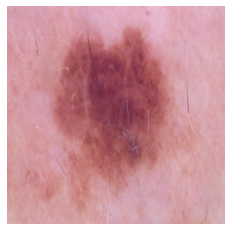

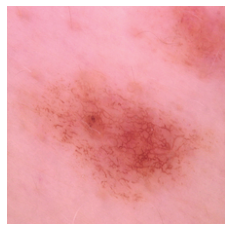

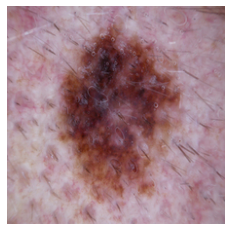

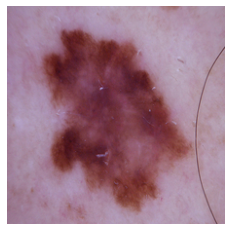

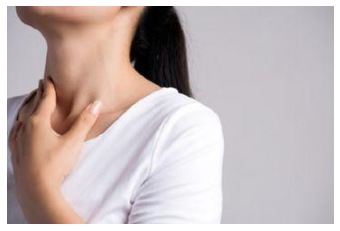

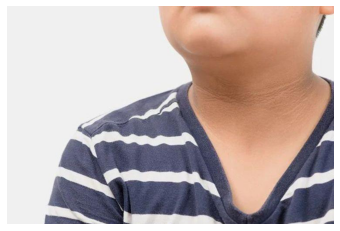

In [ ]:
# Melihat gambar pada dataset

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

index = 3

x_benign = [os.path.join(dir_benign, fname) 
                for fname in files_benign[index-2:index]]
x_malignant = [os.path.join(dir_malignant, fname) 
                for fname in files_malignant[index-2:index]]
x_normal = [os.path.join(dir_normal, fname) 
                for fname in files_normal[index-2:index]]


for x, y in enumerate(x_benign+x_malignant+x_normal):
  gambar = mpimg.imread(y)
  plt.imshow(gambar)
  plt.axis('Off')
  plt.show()

MODEL CONVOLUTIONAL NEURAL NETWORK


In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
# Membuat model

dir_training = "train/"

training_datagen = ImageDataGenerator(
      rescale = 1.0/255.,
	    rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

dir_validation = "validation/"

validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = training_datagen.flow_from_directory(
	dir_training,
	target_size=(224,224),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	dir_validation,
	target_size=(224,224),
	class_mode='categorical'
)

my_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


my_model.summary()

Found 2936 images belonging to 3 classes.
Found 738 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        73792     
                                       

In [ ]:
labels = train_generator.class_indices.keys()

In [ ]:
my_model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

my_model.fit(train_generator,
          epochs=5,
          steps_per_epoch=15,
          verbose=1,
          validation_data=validation_generator)

Epoch 1/5
15/15 [==============================] - 180s 12s/step - loss: 1.0473 - accuracy: 0.4667 - val_loss: 0.9869 - val_accuracy: 0.4566
Epoch 2/5
15/15 [==============================] - 133s 9s/step - loss: 0.8883 - accuracy: 0.5750 - val_loss: 0.8134 - val_accuracy: 0.5854
Epoch 3/5
15/15 [==============================] - 136s 9s/step - loss: 0.7405 - accuracy: 0.6780 - val_loss: 0.8096 - val_accuracy: 0.6802
Epoch 4/5
15/15 [==============================] - 136s 9s/step - loss: 0.7355 - accuracy: 0.6500 - val_loss: 0.8519 - val_accuracy: 0.5772
Epoch 5/5
15/15 [==============================] - 132s 9s/step - loss: 0.6986 - accuracy: 0.6875 - val_loss: 0.6838 - val_accuracy: 0.6883


TRANSFER LEARNING


In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import Adam

#Import model dasar pre-trained
base_model = Xception(weights='imagenet', input_shape = (224,224,3), include_top=False, pooling = 'avg')

#Output model dasar
x = base_model.output

#Input ke DNN
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

#Model yang akan dilatih
model = Model(inputs=base_model.input, outputs=x)

for layer in base_model.layers:
    layer.trainable = False

model.summary()

#Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

#Melatih model
model.fit(train_generator, epochs=5, steps_per_epoch=10, validation_data = validation_generator, verbose = 1)

83697664/83683744 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                      

In [ ]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_3
13 block2_pool
14 batch_normalization
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_4
23 block3_pool
24 batch_normalization_1
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_5
33 block4_pool
34 batch_normalization_2
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepconv3_a

In [ ]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        accuracy = logs["val_accuracy"]
        loss = logs["val_loss"]
        if accuracy >= self.threshold and loss <= self.threshold:
            self.model.stop_training = True

callback=MyThresholdCallback(threshold=0.98)

for layer in model.layers[:100]:
    layer.trainable = False
for layer in model.layers[100:]:
    layer.trainable = True

optimizers = Adam(learning_rate=0.001, decay = 1e-11, beta_1=0.8, beta_2=0.999, amsgrad=False)

model.compile(optimizer=optimizers, loss='categorical_crossentropy', metrics = ['accuracy'])

model.summary()

model.fit(train_generator, callbacks = [callback], epochs=50, steps_per_epoch=30, validation_data = validation_generator, verbose = 1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
model.evaluate(validation_generator)

24/24 [==============================] - 129s 5s/step - loss: 0.3848 - accuracy: 0.8482


[0.38475891947746277, 0.848238468170166]

Saving dahi1.jpeg to dahi1.jpeg


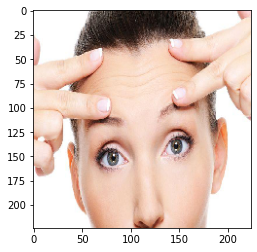

benign: 0.00%
[2.722739e-19 9.805306e-17 1.000000e+00]
malignant: 0.00%
[2.722739e-19 9.805306e-17 1.000000e+00]
normal: 100.00%
[2.722739e-19 9.805306e-17 1.000000e+00]


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input

labels = train_generator.class_indices.keys()

upload = files.upload()

for fn in upload.keys():
 
# Prediksi gambar

  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  i = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, i):
    print("{}: {:.2f}%".format(label, p * 100))
    print(i)

# Menyimpan model akhir

In [ ]:
# Menyimpan model akhir

model.save("model_skincancerdetection.h5")
tf.keras.models.save_model(model,'model_skincancerdetection.hdf5')

In [ ]:
#Convert TF Lite
import tensorflow as tf

#Load model yang telah disimpan
last_model = tf.keras.models.load_model(filepath="model_skincancerdetection.h5")

#Convert model ke bentuk TF Lite
converter = tf.lite.TFLiteConverter.from_keras_model(last_model)
model_tflite = converter.convert()

#Simpan TF Lite model.
with tf.io.gfile.GFile('model_skincancerdetection.tflite', 'wb') as f:
  f.write(model_tflite)

INFO:tensorflow:Assets written to: /tmp/tmphfddkq2q/assets


INFO:tensorflow:Assets written to: /tmp/tmphfddkq2q/assets


In [ ]:
from google.colab import files
files.download("model_skincancerdetection.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Menyimpan dalam bentuk JSON

model_json = model.to_json()
with open("model_tl_json", "w") as file_json:
    file_json.write(model_json)